In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data.drop(data.columns[2410:3579], axis=1, inplace=True)
data.head(5)

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,24.728888,27.64467,24.893251,27.215405,26.310278,24.307577,29.245514,29.070126,30.490877,35.01845,...,17.665596,17.521635,18.051397,17.52665,17.180534,17.99281,17.179358,17.089285,17.443895,DA
1,1290.423500,1190.24150,1224.700700,1160.337400,1100.303100,1088.031500,1152.384600,1154.704500,1115.064600,1319.14640,...,150.075820,150.250370,142.590470,143.92473,148.038850,154.53412,153.505140,149.336000,144.941860,DA
2,9819.987000,9687.30800,9957.726000,9896.959000,10370.940000,10643.110000,10709.778000,11047.445000,11019.559000,10969.06800,...,1462.006700,1473.770300,1483.637200,1470.29220,1457.449600,1450.70750,1469.381200,1475.331200,1460.837900,DA
3,1093.884500,1043.11580,1102.687500,1149.345100,1114.538500,1140.821400,1153.040000,1195.502800,1167.717200,1147.95520,...,136.972170,140.127240,140.010470,140.37068,137.124980,138.57338,135.967210,135.260400,138.557480,DA
4,1945.595200,1919.27200,1890.047000,2007.562900,1974.344600,1933.755500,2028.300500,2040.959200,2060.863300,2075.57150,...,211.261810,214.697770,217.529720,214.75264,221.029900,217.97780,217.672780,212.324870,216.794740,DA


# Buat gambar

In [4]:
gambar = data.copy()

In [5]:
gambar1 = data[data.wd_subclass == 'DA'][0:3]

In [6]:
gambar2 = data[data.wd_subclass == 'DAZ'][0:3]

In [7]:
gambar = pd.concat([gambar1, gambar2])
gambar.head()

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,24.728888,27.64467,24.893251,27.215405,26.310278,24.307577,29.245514,29.070126,30.490877,35.018450,...,17.665596,17.521635,18.051397,17.526650,17.180534,17.992810,17.179358,17.089285,17.443895,DA
1,1290.423500,1190.24150,1224.700700,1160.337400,1100.303100,1088.031500,1152.384600,1154.704500,1115.064600,1319.146400,...,150.075820,150.250370,142.590470,143.924730,148.038850,154.534120,153.505140,149.336000,144.941860,DA
2,9819.987000,9687.30800,9957.726000,9896.959000,10370.940000,10643.110000,10709.778000,11047.445000,11019.559000,10969.068000,...,1462.006700,1473.770300,1483.637200,1470.292200,1457.449600,1450.707500,1469.381200,1475.331200,1460.837900,DA
1950,63.675390,71.42969,54.515865,75.541830,59.235820,43.579388,60.494823,39.674545,68.037620,79.678460,...,10.015361,9.846724,10.150140,9.750017,8.608645,10.823217,8.625998,10.128339,9.736727,DAZ
1951,53.456270,51.67845,49.296844,52.897137,53.157190,50.602825,48.406593,43.893345,54.005627,49.732048,...,5.645426,5.510853,5.443565,4.329355,5.490774,5.263538,4.980087,4.796206,5.550964,DAZ


In [8]:
gambar.to_csv('gambar.csv')

# Selesai

In [4]:
dadaz = [
    'DA' 
]

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [5]:
data['wd_subclass'].value_counts(normalize=True)*100

1    57.336078
0    42.663922
Name: wd_subclass, dtype: float64

# Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((2720, 2410), (681, 2410))

In [ ]:
### from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


rfc = RandomForestClassifier(n_estimators=500, max_features = 25)
rfc.fit(X_train, y_train)

In [11]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
47,3889.5566,0.006068
48,3890.4524,0.005950
51,3893.1409,0.005916


In [12]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

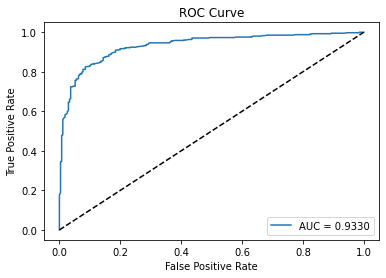

In [13]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [106]:
roccurve = pd.DataFrame({'fpr' : fpr,
                  'tpr' : tpr,
                  'threshold' : tr})
roccurve[(roccurve.threshold >= 0.49) & (roccurve.threshold <= 0.52)]

,fpr,tpr,threshold
115,0.162362,0.878049,0.520
116,0.162362,0.885366,0.510
117,0.169742,0.887805,0.506
118,0.169742,0.892683,0.502
119,0.177122,0.897561,0.498
120,0.184502,0.900000,0.496


In [116]:
roccurve.to_csv('roccurve.csv')

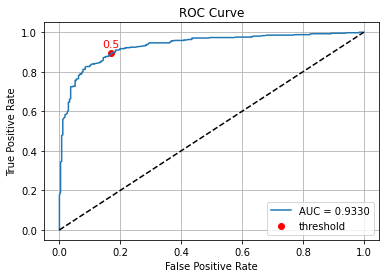

In [115]:
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.scatter(x = 0.169742, y = 0.892683, color = 'r',  label = 'threshold')
plt.annotate('0.5', xy=[0.169742, 0.922683],  ha = 'center', color='r', size = 11)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

In [16]:
y_pred = rfc.predict(X_test)

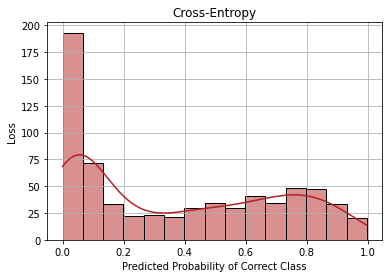

In [92]:
#plt.figure(figsize=(14,7))
#sns.histplot(x=1 - y_pred_proba_test,  bins = 50, color = 'firebrick')
sns.histplot(x=1 - y_pred_proba_test,  bins = 15, color = 'firebrick', kde=True)
plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Loss')
plt.title('Cross-Entropy')
plt.grid()

In [119]:
wd_subclass = []
for i in y_test :
    if i == 0:
        wd_subclass.append('Katai putih DAZ')
    elif i == 1 :
        wd_subclass.append('Katai putih DA')
dh = pd.DataFrame({'wd_subclass' : wd_subclass})

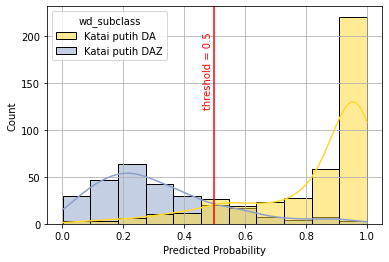

In [120]:
#plt.figure(figsize=(14,7))
sns.histplot(x=y_pred_proba_test, kde=True, hue = dh.wd_subclass, palette = 'Set2_r')
plt.axvline(x = 0.5, color = 'r', label = 'threshold = 0.5')
plt.annotate('threshold = 0.5', xy=[0.48, 125],  ha = 'center', rotation = 90, color='r', size = 10)
plt.xlabel('Predicted Probability')
plt.grid()

In [40]:
y_pred_proba_test = rfc.predict_proba(X_test)[:][:,1]
y_pred_test = rfc.predict(X_test)

test = pd.DataFrame({'y_pred_proba' : y_pred_proba_test,
                    'y_pred' : y_pred_test})
test.head(3)

,y_pred_proba,y_pred
0,0.950,1
1,0.952,1
2,0.372,0


In [41]:
test.to_csv('nilai test.csv')

In [42]:
y_pred_proba_train = rfc.predict_proba(X_train)[:][:,1]
y_pred_train = rfc.predict(X_train)

test = pd.DataFrame({'y_pred_proba' : y_pred_proba_train,
                    'y_pred' : y_pred_train})
test.head(3)

,y_pred_proba,y_pred
0,0.078,0
1,0.994,1
2,0.138,0


In [43]:
test.to_csv('nilai train.csv')

In [62]:
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba

array([[0.05 , 0.95 ],
       [0.048, 0.952],
       [0.628, 0.372],
       ...,
       [0.692, 0.308],
       [0.814, 0.186],
       [0.71 , 0.29 ]])

In [63]:
y_pred_proba_test

array([0.95 , 0.952, 0.372, 0.962, 0.978, 0.954, 0.936, 0.284, 0.184,
       0.838, 0.126, 0.684, 0.796, 0.924, 0.638, 0.976, 0.2  , 0.53 ,
       0.35 , 0.506, 0.214, 0.942, 0.95 , 0.274, 0.594, 0.922, 0.984,
       0.766, 0.95 , 0.98 , 0.894, 0.914, 0.316, 0.966, 0.402, 0.36 ,
       0.782, 0.264, 0.422, 0.892, 0.878, 0.836, 0.054, 0.152, 0.988,
       0.138, 0.912, 0.504, 0.944, 0.686, 0.984, 0.096, 0.404, 0.42 ,
       0.91 , 0.166, 0.93 , 0.296, 0.036, 0.366, 0.904, 0.918, 0.942,
       0.856, 0.966, 0.66 , 0.806, 0.858, 0.104, 0.992, 0.268, 0.996,
       0.186, 0.26 , 0.314, 0.088, 0.484, 0.92 , 0.728, 0.498, 0.236,
       0.97 , 0.994, 0.934, 0.498, 0.942, 0.462, 0.976, 0.228, 0.984,
       0.468, 0.974, 0.342, 0.966, 0.106, 0.608, 0.266, 0.14 , 0.822,
       0.072, 0.946, 0.942, 0.926, 0.864, 0.99 , 0.502, 0.574, 0.676,
       0.65 , 0.468, 0.982, 0.434, 0.208, 0.662, 1.   , 0.372, 0.922,
       0.158, 0.862, 0.98 , 1.   , 0.152, 0.184, 0.938, 0.872, 0.526,
       0.952, 0.688,

In [64]:
y_pred_0 = rfc.predict_proba(X_test)[:][:,0]

In [93]:
pp=1

# Properti data

In [4]:
print(len(data[data.wd_subclass == 'DA']))
print(len(data[data.wd_subclass == 'DAZ']))

1950
1451


In [5]:
1950 + 1451

3401

In [6]:
#rerata SNR

obsid = pd.read_csv('data olah dg scid.csv')
obsid.head()

,Unnamed: 0,index,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,...,8753.87,8755.887,8757.902,8759.919,8761.937,8763.954,8765.973,8767.991,8770.011,wd_subclass
0,0,FLUX315238,24.728888,27.64467,24.893251,27.215405,26.310278,24.307577,29.245514,29.070126,...,2.305983,2.318109,2.765418,3.867865,2.649998,2.567636,4.272257,3.811362,3.450063,DA
1,1,FLUX1608014,1290.423500,1190.24150,1224.700700,1160.337400,1100.303100,1088.031500,1152.384600,1154.704500,...,29.975872,29.589800,23.640617,29.610317,40.758750,18.753872,17.967580,41.045070,27.532790,DA
2,2,FLUX2915216,9819.987000,9687.30800,9957.726000,9896.959000,10370.940000,10643.110000,10709.778000,11047.445000,...,579.567200,578.883200,583.971700,584.477800,574.144800,595.889800,582.767200,592.659670,604.935850,DA
3,3,FLUX8206211,1093.884500,1043.11580,1102.687500,1149.345100,1114.538500,1140.821400,1153.040000,1195.502800,...,42.978703,43.923730,48.343330,53.065643,42.269257,54.907402,44.017075,50.292423,54.463524,DA
4,4,FLUX14604029,1945.595200,1919.27200,1890.047000,2007.562900,1974.344600,1933.755500,2028.300500,2040.959200,...,75.729020,80.580010,78.621864,77.513725,85.217270,80.622410,79.995480,79.216170,73.160150,DA


In [7]:
lamost = pd.read_csv('lamost_full')
lamost.head()

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,tcomment,offsets,offsets_v,ra,dec,wd_subclass,teff,teff_err,logg,logg_err
0,101076,G12763484624375,2676893926929699200,J220838.58-013731.7,2011-10-24,55859,55858,F5902,1,76,...,.,0,0.0,332.160763,-1.625490,DA,-9999.00,-9999.00,-9999.000,-9999.000
1,101151,G12762587004699,2677056689010163456,J220823.66-011534.2,2011-10-24,55859,55858,F5902,1,151,...,.,0,0.0,332.098588,-1.259508,DA,24000.00,672.02,8.263,0.076
2,112211,G13351718912434,2679476512239443328,J221640.39+012741.2,2011-10-24,55859,55858,F5902,12,211,...,.,0,0.0,334.168324,1.461445,DA,17122.64,221.39,7.933,0.037
3,116148,G13358737732360,2683213511743993472,J220522.86+021837.5,2011-10-24,55859,55858,F5902,16,148,...,.,0,0.0,331.345250,2.310432,DA,14070.30,215.59,8.063,0.028
4,204023,G8933577968159,2497952567036766848,J025747.26-002737.2,2011-10-24,55859,55858,F5907,4,23,...,No,0,0.0,44.446950,-0.460360,DA,-9999.00,-9999.00,-9999.000,-9999.000


In [9]:
fluxobsid = []
for i in lamost.index:
    fluxobsid.append('FLUX'+str(lamost.obsid[i]))
lamost['index'] = fluxobsid

In [10]:
df = pd.merge(lamost,obsid, how='inner')

In [12]:
lamost = df.copy()
snr = lamost[(lamost.snru != -9999) & (lamost.snru != 9999) 
             & (lamost.snrg != -9999) & (lamost.snrg != 9999) 
             & (lamost.snrr != -9999) & (lamost.snrr != 9999) 
             & (lamost.snri != -9999) & (lamost.snri != 9999) 
             & (lamost.snrz != -9999) & (lamost.snrz != 9999)]

In [13]:
meansnr = (snr.snru + snr.snrg + snr.snrr + snr.snri + snr.snrz)/5
snr['meansnr'] = meansnr

C:\Users\pc\AppData\Local\Temp/ipykernel_4004/264863837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snr['meansnr'] = meansnr


In [16]:
snr.meansnr[snr.meansnr<= 100].mean()

25.2819870370371

In [17]:
snr.meansnr.min()

0.046

In [18]:
len(snr[snr.meansnr <=100])

3240

In [19]:
len(snr[snr.meansnr > 100])

148

In [29]:
print(snr.columns[0:50])

Index(['obsid', 'uid', 'gp_id', 'designation', 'obsdate', 'lmjd', 'mjd',
       'planid', 'spid', 'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg',
       'snrr', 'snri', 'snrz', 'class', 'subclass', 'z', 'z_err', 'ps_id',
       'mag_ps_g', 'mag_ps_r', 'mag_ps_i', 'mag_ps_z', 'mag_ps_y',
       'gaia_source_id', 'gaia_g_mean_mag', 'tsource', 'fibertype', 'tfrom',
       'tcomment', 'offsets', 'offsets_v', 'ra', 'dec', 'wd_subclass', 'teff',
       'teff_err', 'logg', 'logg_err', 'index', 'Unnamed: 0', '3847.6904',
       '3848.5764', '3849.4626', '3850.349', '3851.2358', '3852.1228'],
      dtype='object')


In [46]:
snr[(snr.meansnr > 80) & (snr.meansnr <= 90) & (snr.wd_subclass == 'DAZ')]

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,8753.87,8755.887,8757.902,8759.919,8761.937,8763.954,8765.973,8767.991,8770.011,meansnr
1958,486308021,G16169785713991,3376977929802701440,J061447.54+222646.4,2016-12-01,57724,57723,HIP29425K201,8,21,...,354.22668,364.52414,358.47653,363.86636,377.20425,385.70102,386.25687,403.31894,417.89703,82.86
2035,497208206,G16169866391408,3376869834066408960,J061419.01+214304.8,2016-12-17,57740,57739,HIP29425K201,8,206,...,764.32880,781.60266,818.94640,835.67236,868.14670,864.86194,884.32275,932.13040,913.46110,84.55


In [ ]:
snr[(snr.meansnr > 80) & (snr.meansnr < 90) & (snr.wd_subclass == 'DAZ')]

In [73]:
x = np.linspace(0,180)
x

array([  0.,  30.,  60.,  90., 120., 150., 180.])

In [76]:
# bikin grafik perbandingan gini dan entropi

x = np.linspace(0,180)
entropi = np.sin(np.radians(x))
gini = 0.5*(np.sin(np.radians(x)))
p = x/90

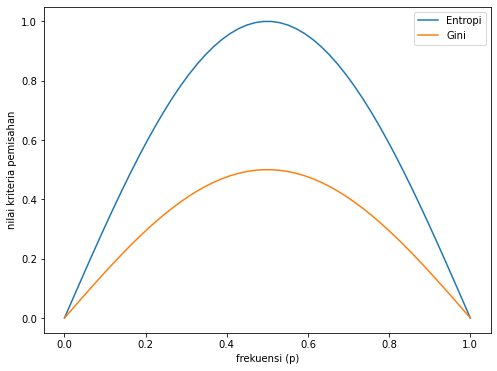

In [83]:
plt.figure(figsize = (8,6))

plt.plot(p/2,entropi, label = 'Entropi')
plt.plot(p/2,gini, label = 'Gini')
plt.xlabel('frekuensi (p)')
plt.ylabel('nilai kriteria pemisahan')
plt.legend()
plt.show()

In [1]:
p=0